In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

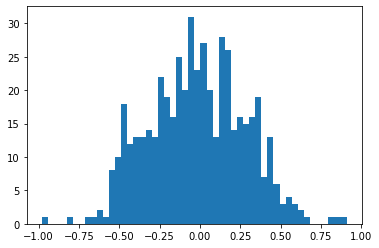

In [2]:
# https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy
def get_truncated_normal(mean=0, sd=0.3, low=-1, upp=1):
    return truncnorm(
        (low - mean)/sd, 
        (upp - mean)/sd, 
        loc = mean, 
        scale = sd)

X = get_truncated_normal()
plt.hist(X.rvs(500), bins = 50)
plt.show()

In [3]:
class post:
    
    def __init__(self, kind, user_ideology, user_trust):
        self.type = kind   # binary: either post (1) or comment (0)
        
        # post's ideology score
        self.ideology = get_truncated_normal(mean=user_ideology, sd=0.2, low=-1, upp=1).rvs()  
        
        # post's trustworthiness
        self.trust = get_truncated_normal(mean=user_trust, sd=0.1, low=0, upp=1).rvs()

In [6]:
class user:
    def __init__(self):
        self.ideology = get_truncated_normal(mean=0, sd=0.3, low=-1, upp=1).rvs()
        # care value is dependent on the absolute value of ideology value of the user + noise,
        # on the assumption based on research that reveals people with more radial political leanings tend to be more engaging
        self.care = get_truncated_normal(mean=abs(self.ideology), sd = 0.15, low = 0, upp=1).rvs()
        self.trust = get_truncated_normal(mean=0.5, sd=0.15, low=0, upp=1).rvs()   # post's trustworthiness
        
def create_n_users (n):
    user_list = []
    for i in range(n):
        user_list.append(user())
    return user_list

        
        

In [5]:
newpost = post(1)
print(newpost.type, newpost.ideology, newpost.trust)

user_list = create_n_users(50)
for user in user_list:
    print(user.ideology, user.care)

1 0.2155867410685708 0.3706556001898639
0.7512532729899053 -0.41222896917684787
-0.6136844400881146 -0.12612704540143835
0.08687690487608872 0.27543921682745737
0.23774328672851266 0.1253366701783167
0.1257590123820351 0.3864213987973552
-0.345615958676341 0.129768906574814
-0.2677080016003343 -0.12673428359564115
0.15961421806401146 -0.1594461529805564
0.05434187686368891 -0.13358738514444352
0.2878922983589702 0.12010537299719797
0.2570771963791372 -0.34127284558306903
-0.5061811584464798 -0.2560379658392075
0.7580026460519401 -0.7290376131293815
-0.17777280887311228 -0.3850290486354762
0.17861131670163968 -0.2271436956001429
0.090940624460974 -0.12556067071726904
-0.08097361787643735 -0.0829534413530789
-0.3659382045412278 -0.2510773886210096
-0.34244464835196237 -0.4814609508760273
-0.01296870552224838 -0.3061739494512033
0.39201986936044386 0.13999352372446797
-0.17723964349811522 -0.012108839162039656
-0.49055627916124134 0.2913277682093412
0.05840267522314886 -0.0468701620518785